# Import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# methods

In [3]:
def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

# Data read

In [4]:
train_x = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/train_x.npy')
test_x = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/test_x.npy')
val_x = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/valid_x.npy')
train_y = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/train_y.npy')
test_y = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/test_y.npy')
val_y = np.load('/content/drive/MyDrive/CVPR-NAS-2021/data/valid_y.npy')

# Image Normalization

In [5]:
train_x = image_normalization(train_x)
test_x = image_normalization(test_x)
val_x = image_normalization(val_x)

In [6]:
train_y = to_categorical(train_y, num_classes=4)
val_y = to_categorical(val_y, num_classes=4)
test_y = to_categorical(test_y, num_classes=4)

In [7]:
train_x = train_x.transpose((0, 2, 3, 1))
test_x = test_x.transpose((0, 2, 3, 1))
val_x = val_x.transpose((0, 2, 3, 1))

# Plot Random Image

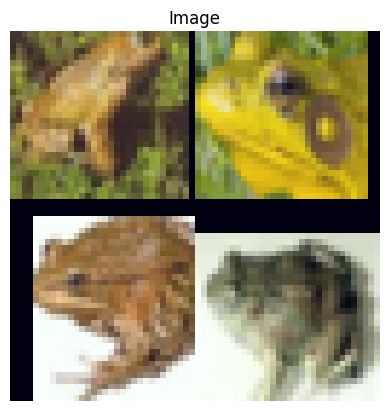

[1. 0. 0. 0.]


In [8]:
Random_Num = np.random.randint(0,(len(train_x)-1))
img = train_x[Random_Num]

plt.imshow(img)
plt.title('Image')
plt.axis('off')
plt.show()
print(train_y[Random_Num])

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator


'''# Data Augmentation
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
data_gen.fit(train_images)
'''

base_model = ResNet50(weights=None, include_top=False, input_shape=(64, 64, 3))

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(4, activation='softmax'))

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_x, train_y, batch_size=32,epochs=10,validation_data =( val_x, val_y))

Epoch 1/10
  34/1407 [..............................] - ETA: 1:11 - loss: 2.5567 - accuracy: 0.2399

In [ ]:
history = model.fit(data_gen.flow(X_train, y_train_encoded, batch_size=32), epochs=10, validation_data=(X_val, y_val_encoded))